In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

In [2]:
spark = SparkSession.builder.appName("TempData").getOrCreate()

In [3]:
temp_df = spark.read.parquet("global_temperatures.parquet")
temp_df.show()
temp_df.count()

+----------+------------------+-----------------------------+-------+
|        dt|AverageTemperature|AverageTemperatureUncertainty|Country|
+----------+------------------+-----------------------------+-------+
|1990-04-01|             9.259|                          0.1|   Asia|
|1929-11-01|0.5429999999999999|                          0.2|   Asia|
|1981-03-01|             1.902|                         0.11|   Asia|
|1923-06-01|             19.25|                         0.22|   Asia|
|1933-01-01|            -9.071|                         0.23|   Asia|
|1834-02-01|             -5.82|                         2.08|   Asia|
|2010-10-01|             9.553|                        0.081|   Asia|
|1953-02-01|            -4.454|                        0.102|   Asia|
|2008-07-01|            22.037|                        0.108|   Asia|
|1952-06-01|            19.199|                        0.113|   Asia|
|2008-10-01|            10.089|                        0.116|   Asia|
|1952-09-01|        

577462

In [4]:
temp_df_clean = temp_df.filter(temp_df.AverageTemperature.isNotNull())
temp_df_clean.show()
temp_df_clean.count()

+----------+------------------+-----------------------------+-------+
|        dt|AverageTemperature|AverageTemperatureUncertainty|Country|
+----------+------------------+-----------------------------+-------+
|1990-04-01|             9.259|                          0.1|   Asia|
|1929-11-01|0.5429999999999999|                          0.2|   Asia|
|1981-03-01|             1.902|                         0.11|   Asia|
|1923-06-01|             19.25|                         0.22|   Asia|
|1933-01-01|            -9.071|                         0.23|   Asia|
|1834-02-01|             -5.82|                         2.08|   Asia|
|2010-10-01|             9.553|                        0.081|   Asia|
|1953-02-01|            -4.454|                        0.102|   Asia|
|2008-07-01|            22.037|                        0.108|   Asia|
|1952-06-01|            19.199|                        0.113|   Asia|
|2008-10-01|            10.089|                        0.116|   Asia|
|1952-09-01|        

544811

In [5]:
avg_temp_country = temp_df_clean.groupBy('Country').agg(avg('AverageTemperature'))
avg_temp_country.show()                                                        

+-------------+-----------------------+
|      Country|avg(AverageTemperature)|
+-------------+-----------------------+
|         Chad|      27.12046628242078|
|       Russia|     -5.521881912681926|
|     Anguilla|     26.610491850431444|
|     Paraguay|      23.23796755725193|
| Kingman Reef|     27.133034438775532|
|        Yemen|     26.253596725288048|
|Palmyra Atoll|     27.163455994897976|
|      Senegal|      27.96737499999998|
|       Sweden|     2.3863319646241337|
|     Kiribati|      26.73686534779831|
|       Guyana|      25.93092011549569|
|        Burma|     23.706197239536912|
|       Jersey|     10.928408717624773|
|      Eritrea|     26.802653110047824|
|  Philippines|      26.44047248677251|
|        Tonga|     23.236247852760698|
|     Djibouti|     28.816602533172517|
|     Malaysia|     25.805442007797236|
|    Singapore|     26.523102826510765|
|         Fiji|     25.038671779141108|
+-------------+-----------------------+
only showing top 20 rows



In [6]:
from pyspark.sql.functions import col, substring

df_with_year = temp_df_clean.withColumn('Year',substring('dt',1,4))
df_with_year.show()

+----------+------------------+-----------------------------+-------+----+
|        dt|AverageTemperature|AverageTemperatureUncertainty|Country|Year|
+----------+------------------+-----------------------------+-------+----+
|1990-04-01|             9.259|                          0.1|   Asia|1990|
|1929-11-01|0.5429999999999999|                          0.2|   Asia|1929|
|1981-03-01|             1.902|                         0.11|   Asia|1981|
|1923-06-01|             19.25|                         0.22|   Asia|1923|
|1933-01-01|            -9.071|                         0.23|   Asia|1933|
|1834-02-01|             -5.82|                         2.08|   Asia|1834|
|2010-10-01|             9.553|                        0.081|   Asia|2010|
|1953-02-01|            -4.454|                        0.102|   Asia|1953|
|2008-07-01|            22.037|                        0.108|   Asia|2008|
|1952-06-01|            19.199|                        0.113|   Asia|1952|
|2008-10-01|            1

In [13]:
import matplotlib.pyplot as plt

p_df = df_with_year.filter(df_with_year.Country == 'Turkey').toPandas()
p_df['Year']=p_df['Year'].astype(int)

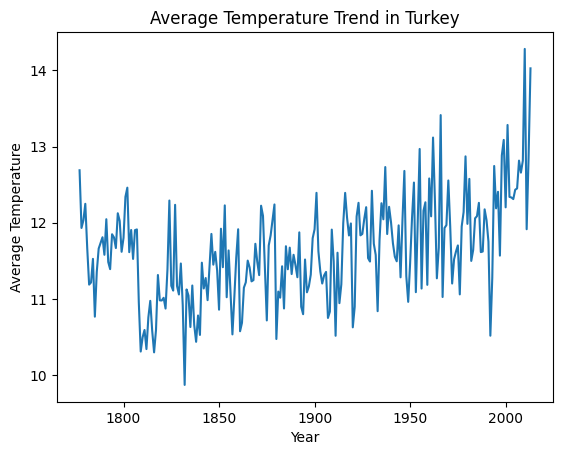

In [14]:
p_df = p_df.sort_values(by='Year')

p_df = p_df.groupby('Year')['AverageTemperature'].mean().reset_index()

plt.plot(p_df['Year'],p_df['AverageTemperature'])
plt.title('Average Temperature Trend in Turkey')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()

In [15]:
high_temp_df = df_with_year.filter(df_with_year["AverageTemperature"]>32)
high_temp_df_avg = high_temp_df.groupBy('Country').agg(avg('AverageTemperature').alias('AvgTemp'))

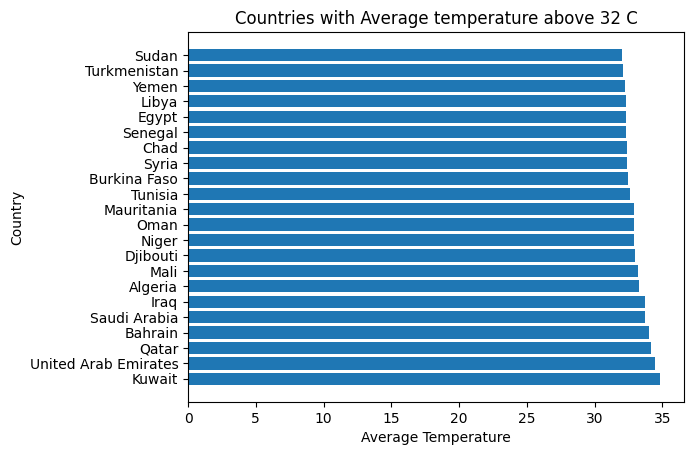

In [16]:
p_df = high_temp_df_avg.toPandas()
p_df = p_df.sort_values(by='AvgTemp',ascending=False)

plt.barh(p_df['Country'], p_df['AvgTemp'])
plt.title("Countries with Average temperature above 32 C")
plt.xlabel("Average Temperature")
plt.ylabel("Country")
plt.show()